In [18]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath("."))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from src import results
import importlib
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from src.plotting import plot_fill_between_mean_std,plot_fill_between_min_max
from src.plotting import plot_matrix_fill_between_mean_min_max,plot_matrix_fill_between_mean_std

Valores iniciais: 
- T_MIN=0.1
- T_MAX=6
- N_ANTS = 30
- N_ITS = 100
- ALPHA=1

In [19]:
folders = list(pathlib.Path("../../results/p_hat700/").glob("*_evap"))

In [20]:
folders

[PosixPath('../../results/p_hat700/0_15_evap'),
 PosixPath('../../results/p_hat700/0_01_evap'),
 PosixPath('../../results/p_hat700/0_05_evap'),
 PosixPath('../../results/p_hat700/0_1_evap'),
 PosixPath('../../results/p_hat700/0_2_evap')]

In [21]:
results_agg_per_run = dict()
for folder in folders:
    folder_name = str(folder).split("/")[-1].replace("_",".", 1)
    files_of_folder = list(folder.glob("*.csv"))
    results_agg = results.ResultsAgg()
    results_agg.agg_files(files_of_folder, delimiter=",")
    results_agg_per_run[folder_name] = results_agg

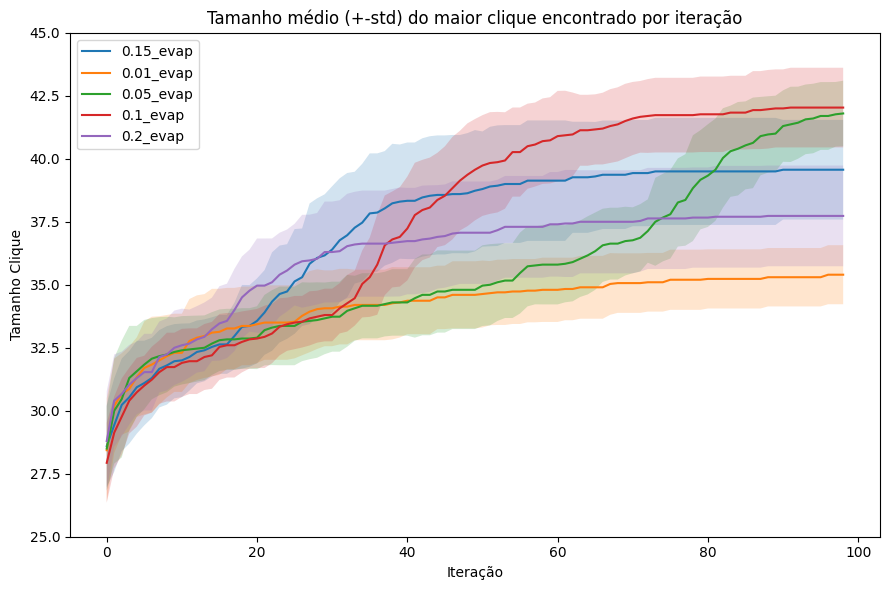

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (+-std) do maior clique encontrado por iteração")
plt.ylim((25, 45))
plt.savefig("./assets/p_hat_4_cliques_std.png")
fig.tight_layout()

Pelo gráfico acima, é possível ver que, até a iteração 15, todos, independentemente da taxa de evaporação, possuíam o mesmo movimento de melhor clique encontrado ao redor de 32. A partir da iteração 20 é possível ver que as taxas de evaporação 0.2 e 0.15 permitiram um crescimento mais rápido do melhor clique encontrado, favorecendo as arestas que estavam em cliques maiores nas primeiras iterações, o que permitiu um pouco de exploration após mas priorizando exploitation.

A taxa de evaporação 0.01 é uma taxa muito baixa o que fez com que a probabilidade de escolher qualquer aresta fosse praticamente a mesma. Isso propiciou um baixo exploitation das melhores áreas e, portanto, foi a que menos melhorou o seu resultado ao final.

As taxas 0.1 e 0.05 foram que que propiciaram os melhores resultados a longo prazo. Por algum motivo, ao redor da iteração 30, a taxa de variação 0.1 saiu do movimento do 0.01 e 0.05 e começou a encontrar resultados melhores a uma alta taxa. O mesmo aconteceu para o caso 0.05 ao redor da iteração 70. Talvez o mesmo acontecesse para o caso 0.01 com uma quantidade maior de iterações.



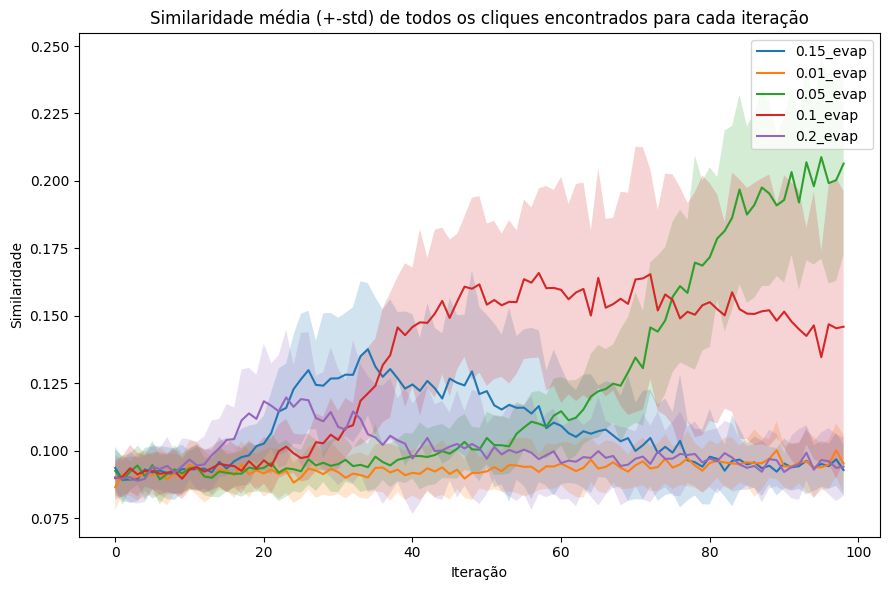

In [23]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_similarity.values()), ax, run)
    # plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Similaridade")
ax.set_xlabel("Iteração")
ax.set_title("Similaridade média (+-std) de todos os cliques encontrados para cada iteração")
# plt.ylim((25, 45))
plt.savefig("./assets/p_hat_4_sims_std.png")
fig.tight_layout()

Podemos perceber que a similaridade média no caso da evaporação 0.05 passou de 20%. Isso significa que estava priorizando exploitation e segue o movimento da melhora da solução. Já para o 0.1, a similaridade ficou ao redor de 0.16 na média e permaneceu assim.

Dessa forma, já que a taxa de evaporação 0.1 conseguiu resultados melhores no geral além de controlar a similaridade dos resultados, ela foi escolhida como a melhor taxa de evaporação.